✅ Loaded data: (436, 13)
✅ Stratified train/test split complete

📊 Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           2       0.88      0.97      0.92        68
           3       0.36      0.29      0.32        14

    accuracy                           0.81        88
   macro avg       0.58      0.47      0.50        88
weighted avg       0.77      0.81      0.78        88



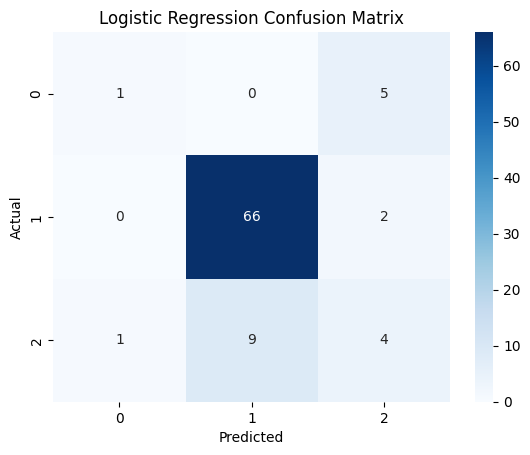


📊 Random Forest Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        68
           3       1.00      1.00      1.00        14

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



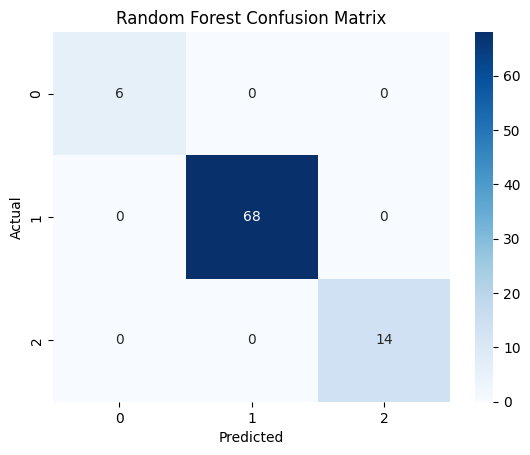


📊 Support Vector Machine Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           2       1.00      0.99      0.99        68
           3       0.93      1.00      0.97        14

    accuracy                           0.99        88
   macro avg       0.98      1.00      0.99        88
weighted avg       0.99      0.99      0.99        88



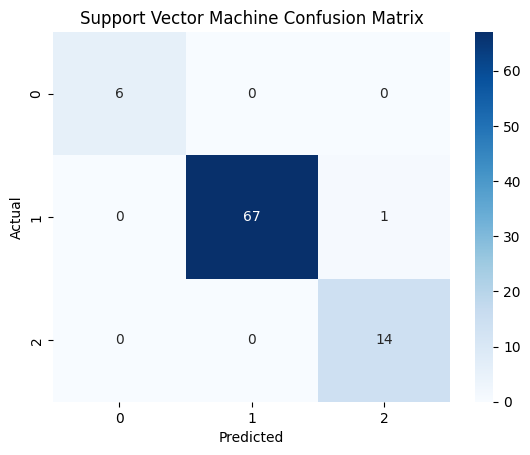

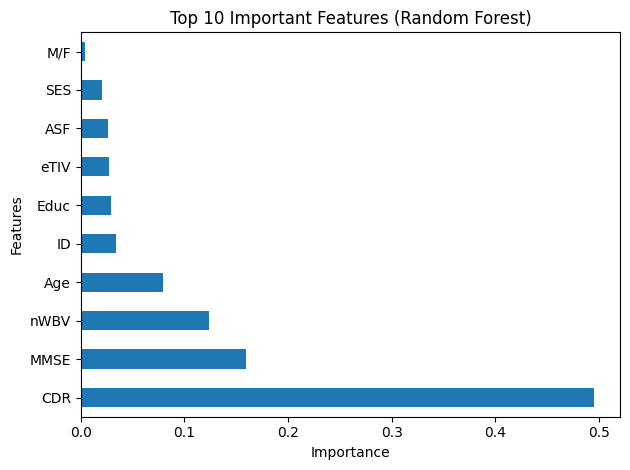

In [3]:
# 🧠 Alzheimer's Disease Classification – Clinical Data (ML Models)

# ====================
# 1. Imports
# ====================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ====================
# 2. Load Preprocessed Data
# ====================
df = pd.read_csv("../data/processed/clinical/3_normalized.csv")
print(f"✅ Loaded data: {df.shape}")

# ====================
# 3. Features & Target
# ====================
# Assuming 'Group' is the target (already label-encoded)
target_col = 'Group'
X = df.drop(columns=[target_col])
y = df[target_col]

# ====================
# 4. Train/Test Split (with stratification)
# ====================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("✅ Stratified train/test split complete")

# ====================
# 5. Evaluation Function
# ====================
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n📊 {name} Classification Report")
    print(classification_report(y_test, y_pred, zero_division=0))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ====================
# 6. Logistic Regression
# ====================
lr = LogisticRegression(max_iter=2000, solver='liblinear')
lr.fit(X_train, y_train)
evaluate_model(lr, "Logistic Regression")

# ====================
# 7. Random Forest
# ====================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, "Random Forest")

# ====================
# 8. Support Vector Machine
# ====================
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
evaluate_model(svm, "Support Vector Machine")

# ====================
# 9. Feature Importance (Random Forest)
# ====================
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
